### Preprocess data and try different feature selection techniques
* Retain top correlated features with the target
* Eliminate collinear features, to reduce redundancy

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib
import plotly.figure_factory as ff
from IPython.core.display import display
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# pd.set_option('display.max_columns', None)
# pd.reset_option('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

In [2]:
# define useful function to create scatterplots of target feature against desired columns
def scatterplots(df, target, columns, ncol=None, figsize=(20, 25)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.7, hspace=0.7)
    for i, col in enumerate(columns):
        # ax = axes.flatten()[i]
        # ax.scatter(x = col, y = target, data=df, alpha=0.5)
        sns.regplot(ax=axes.flatten()[i], x=col, y=target, data=df, scatter_kws={'alpha':0.5})
        # ax.set(xlabel=col, ylabel=target)
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

### Load data

In [3]:
pm10_2017_2019 = r'../../data/processed/pm10_2017_2019'
pm10_year_diff = r'../../data/processed/pm10_year_diff'
pm10_year_pct_change = r'../../data/processed/pm10_year_pct_change'
pm10_year_diff_top_corr =  r'../../data/processed/pm10_year_diff_top_corr'
pm10_year_pct_change_top_corr = r'../../data/processed/pm10_year_pct_change_top_corr'

df_norm = pd.read_csv(pm10_2017_2019)
df_year_diff = pd.read_csv(pm10_year_diff)
df_year_diff_top = pd.read_csv(pm10_year_diff_top_corr)
df_year_pct_change = pd.read_csv(pm10_year_pct_change)
df_year_pct_change_top = pd.read_csv(pm10_year_pct_change_top_corr)

In [4]:
# Work with top correlated variables with our target
# this reduces number of columns from 1000

display(df_year_pct_change_top)
display(df_year_diff_top)

df = pd.merge(df_year_diff_top, df_year_pct_change_top)
df

,AQI_2019,Personal income (thousands of dollars) 2018_2019_pct_change,Per capita personal income (dollars) 2018_2019_pct_change,BACH_TOT_2017_2019_pct_change,Median Household Income_2017_2019_pct_change,90% CI UB medh inc_2017_2019_pct_change,BACH_TOT_ratio_2017_2019_pct_change,90% CI Lower Bound LB medh inc_2017_2019_pct_change,Employed_2017_2019_pct_change,TOT_MALE_ratio_2017_2019_pct_change,...,HWAC_FEMALE_ratio_2017_2019_pct_change,HWA_FEMALE_ratio_2017_2018_pct_change,H_FEMALE_ratio_2017_2019_pct_change,NH_MALE_ratio_2017_2019_pct_change,HWAC_FEMALE_ratio_2017_2018_pct_change,H_FEMALE_ratio_2017_2018_pct_change,NH_MALE_ratio_2018_2019_pct_change,NH_FEMALE_ratio_2018_2019_pct_change,NH_FEMALE_ratio_2017_2018_pct_change,NH_FEMALE_ratio_2017_2019_pct_change
0,20.073389,0.030317,0.031654,-0.005177,0.066941,0.085679,-0.004235,0.047281,0.038350,-0.000481,...,0.066156,0.032477,0.069673,-0.002724,0.033374,0.036809,-0.001246,-0.001100,-0.000907,-0.002005
1,12.958515,0.055158,0.038434,0.104207,0.093371,0.107546,0.069080,0.077970,0.063602,0.001232,...,0.067250,0.035598,0.065508,-0.001108,0.036139,0.036086,-0.000012,-0.002554,-0.001858,-0.004407
2,13.125000,0.034268,0.034342,0.040944,0.150067,0.125771,0.041679,0.177317,0.009473,-0.003826,...,0.056305,0.019292,0.055696,-0.005313,0.023307,0.015763,-0.004204,0.001529,0.000176,0.001705
3,11.247911,0.029182,0.026966,-0.230957,0.070584,0.097186,-0.233963,0.039399,0.010616,0.000006,...,0.028091,0.013565,0.031366,-0.003912,0.014217,0.031752,0.001109,-0.003511,0.001533,-0.001983
4,17.413408,0.042433,0.046478,0.096472,-0.006453,-0.020749,0.086319,0.009991,0.023674,-0.001054,...,0.001100,-0.000633,0.001121,-0.004857,-0.000383,0.000351,-0.007802,0.002468,-0.001403,0.001062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,10.503937,0.037141,0.037051,0.171526,0.066849,0.041718,0.170819,0.095264,-0.019522,-0.001009,...,0.064546,0.022456,0.066122,-0.003205,0.024745,0.026686,-0.001818,-0.000372,-0.001533,-0.001905
204,14.431990,0.023454,0.024796,0.073753,0.119469,0.120713,0.080973,0.118141,-0.017047,-0.000150,...,0.046970,0.030851,0.045745,-0.007886,0.030850,0.029433,-0.003559,-0.002157,-0.005276,-0.007421
205,15.656425,0.027782,0.023512,0.007331,0.102182,0.113662,-0.001584,0.090107,-0.006761,0.000780,...,0.044822,0.021305,0.047402,-0.001170,0.022401,0.023545,-0.000766,-0.001552,-0.001512,-0.003062
206,13.354142,0.034302,0.027690,0.112467,0.129018,0.112862,0.099352,0.147585,0.007338,-0.002162,...,0.028606,0.010813,0.025964,-0.002544,0.008189,0.009373,-0.002465,-0.001158,-0.000593,-0.001750


,AQI_2019,HAA_MALE_ratio_2018_2019_diff,HAAC_MALE_ratio_2017_2019_diff,HAA_MALE_ratio_2017_2019_diff,HAA_MALE_2018_2019_diff,HIA_FEMALE_2018_2019_diff,HIAC_FEMALE_2018_2019_diff,HIA_MALE_2018_2019_diff,HIAC_MALE_2018_2019_diff,HAAC_MALE_2018_2019_diff,...,90% CI LB percent 0-17_2017_2019_diff,90% CI UB 0-17_2018_2019_diff,90% CI LB All Ages_2018_2019_diff,"Poverty Estimate, Age 0-17_2018_2019_diff",90% CI LB percent 0-17_2018_2019_diff,TOT_FEMALE_ratio_2017_2018_diff,90% CI UB 5-17 fam_2018_2019_diff,TOT_FEMALE_ratio_2017_2019_diff,"Poverty Estimate, Age 5-17 in Families_2018_2019_diff",90% CI LB 5-17 fam_2018_2019_diff
0,20.073389,0.001227,0.004126,0.002594,8,14,24,-10,20,15,...,-1652.0,128.0,458.0,-124.0,-376.0,0.019808,-279.0,0.022760,-307.0,-335.0
1,12.958515,-0.001258,-0.004820,-0.001981,-4,8,24,-7,4,-9,...,-1018.0,-25.0,-786.0,67.0,159.0,-0.005348,-256.0,-0.060181,-266.0,-276.0
2,13.125000,0.000885,-0.002493,0.000067,2,-4,-12,5,1,-10,...,-6494.0,-3587.0,-9877.0,-4095.0,-4603.0,0.035381,-2513.0,0.180431,-2802.0,-3091.0
3,11.247911,-0.000051,-0.001577,0.006876,0,-20,-15,13,28,-5,...,-28.0,-330.0,-3297.0,-557.0,-784.0,0.168415,502.0,-0.000273,353.0,204.0
4,17.413408,0.002806,0.006851,0.002255,3,3,-14,14,14,19,...,334.0,774.0,1971.0,836.0,898.0,-0.037888,183.0,0.053409,236.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,10.503937,0.002276,0.005661,0.002258,2,3,0,-4,2,6,...,-160.0,-246.0,-567.0,-242.0,-238.0,-0.012916,-91.0,0.053309,-89.0,-87.0
204,14.431990,-0.000792,0.001185,0.000715,-8,13,17,21,19,-2,...,-5720.0,-7350.0,-20856.0,-7668.0,-7986.0,-0.017496,-2459.0,0.007248,-2473.0,-2487.0
205,15.656425,-0.000568,0.004939,0.000109,-2,7,20,24,33,16,...,92.0,327.0,-1210.0,348.0,369.0,-0.018644,284.0,-0.038357,262.0,240.0
206,13.354142,-0.005542,0.021831,0.012354,-5,-10,-5,2,6,-2,...,-117.0,-354.0,562.0,-369.0,-384.0,0.041256,-263.0,0.109764,-300.0,-337.0


,AQI_2019,HAA_MALE_ratio_2018_2019_diff,HAAC_MALE_ratio_2017_2019_diff,HAA_MALE_ratio_2017_2019_diff,HAA_MALE_2018_2019_diff,HIA_FEMALE_2018_2019_diff,HIAC_FEMALE_2018_2019_diff,HIA_MALE_2018_2019_diff,HIAC_MALE_2018_2019_diff,HAAC_MALE_2018_2019_diff,...,HWAC_FEMALE_ratio_2017_2019_pct_change,HWA_FEMALE_ratio_2017_2018_pct_change,H_FEMALE_ratio_2017_2019_pct_change,NH_MALE_ratio_2017_2019_pct_change,HWAC_FEMALE_ratio_2017_2018_pct_change,H_FEMALE_ratio_2017_2018_pct_change,NH_MALE_ratio_2018_2019_pct_change,NH_FEMALE_ratio_2018_2019_pct_change,NH_FEMALE_ratio_2017_2018_pct_change,NH_FEMALE_ratio_2017_2019_pct_change
0,20.073389,0.001227,0.004126,0.002594,8,14,24,-10,20,15,...,0.066156,0.032477,0.069673,-0.002724,0.033374,0.036809,-0.001246,-0.001100,-0.000907,-0.002005
1,12.958515,-0.001258,-0.004820,-0.001981,-4,8,24,-7,4,-9,...,0.067250,0.035598,0.065508,-0.001108,0.036139,0.036086,-0.000012,-0.002554,-0.001858,-0.004407
2,13.125000,0.000885,-0.002493,0.000067,2,-4,-12,5,1,-10,...,0.056305,0.019292,0.055696,-0.005313,0.023307,0.015763,-0.004204,0.001529,0.000176,0.001705
3,11.247911,-0.000051,-0.001577,0.006876,0,-20,-15,13,28,-5,...,0.028091,0.013565,0.031366,-0.003912,0.014217,0.031752,0.001109,-0.003511,0.001533,-0.001983
4,17.413408,0.002806,0.006851,0.002255,3,3,-14,14,14,19,...,0.001100,-0.000633,0.001121,-0.004857,-0.000383,0.000351,-0.007802,0.002468,-0.001403,0.001062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,10.503937,0.002276,0.005661,0.002258,2,3,0,-4,2,6,...,0.064546,0.022456,0.066122,-0.003205,0.024745,0.026686,-0.001818,-0.000372,-0.001533,-0.001905
204,14.431990,-0.000792,0.001185,0.000715,-8,13,17,21,19,-2,...,0.046970,0.030851,0.045745,-0.007886,0.030850,0.029433,-0.003559,-0.002157,-0.005276,-0.007421
205,15.656425,-0.000568,0.004939,0.000109,-2,7,20,24,33,16,...,0.044822,0.021305,0.047402,-0.001170,0.022401,0.023545,-0.000766,-0.001552,-0.001512,-0.003062
206,13.354142,-0.005542,0.021831,0.012354,-5,-10,-5,2,6,-2,...,0.028606,0.010813,0.025964,-0.002544,0.008189,0.009373,-0.002465,-0.001158,-0.000593,-0.001750


* This reduces number of columns that we initally use to 161 columns

In [5]:
# checking how varied our data columns are for df

unique = []
var = []
for col in df.columns.tolist():
    unique.append([col, df[col].nunique()])
    var.append([col, df[col].var()])
unique.sort(key = lambda x: x[1])
var.sort(key = lambda x: x[1])

display(unique[:20])
display(var[:10])

[['HNA_MALE_2018_2019_diff', 48],
 ['HNAC_FEMALE_2018_2019_diff', 60],
 ['HNAC_MALE_2018_2019_diff', 65],
 ['HAA_FEMALE_2018_2019_diff', 66],
 ['HAA_MALE_2018_2019_diff', 69],
 ['HNAC_FEMALE_2017_2019_diff', 73],
 ['HNAC_MALE_2017_2019_diff', 82],
 ['HAA_FEMALE_2017_2019_diff', 86],
 ['HAAC_FEMALE_2017_2018_diff', 86],
 ['HAA_MALE_2017_2019_diff', 87],
 ['HAAC_FEMALE_2018_2019_diff', 89],
 ['HAAC_MALE_2017_2018_diff', 94],
 ['HAAC_MALE_2018_2019_diff', 95],
 ['HIA_FEMALE_2017_2018_diff', 103],
 ['HIA_MALE_2018_2019_diff', 105],
 ['HIA_FEMALE_2018_2019_diff', 110],
 ['HIA_MALE_2017_2018_diff', 111],
 ['HAAC_FEMALE_2017_2019_diff', 112],
 ['HAAC_MALE_2017_2019_diff', 113],
 ['IA_MALE_2017_2018_diff', 118]]

[['TOT_FEMALE_ratio_2017_2018_pct_change', 1.0073043916858045e-06],
 ['TOT_MALE_ratio_2017_2018_pct_change', 1.0211047386463436e-06],
 ['TOT_MALE_ratio_2017_2019_pct_change', 2.239312408564328e-06],
 ['TOT_FEMALE_ratio_2017_2019_pct_change', 2.244951647902704e-06],
 ['HAA_MALE_ratio_2018_2019_diff', 9.294324299686756e-06],
 ['NH_MALE_ratio_2018_2019_pct_change', 1.802106764406489e-05],
 ['NH_MALE_ratio_2017_2018_pct_change', 1.814542178707539e-05],
 ['HAA_MALE_ratio_2017_2019_diff', 1.88870213721257e-05],
 ['NH_FEMALE_ratio_2018_2019_pct_change', 1.9100318593048414e-05],
 ['NH_FEMALE_ratio_2017_2018_pct_change', 2.0028645476703468e-05]]

* It appears we have somewhat varied data
* The variance for some variables may appear to be very close to 0, but this is because
those column themselves contain very small values, else they would appear in the top of the list containing
least unique counts

## Drop variables that are highly colinear or multicolinear
* retain the variable with largest correlation with the target

In [6]:

X = df.drop('AQI_2019', axis=1)
y = df['AQI_2019']


In [7]:
# this function used to remove collinear variables
# variation inflation factor quantifies the severity of multicollinearity in an ordinary least squares regression analysis
# threshold greater than 5 means highly correlated for vif

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [8]:
calculate_vif_(X)

/home/wkc/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'HAAC_MALE_ratio_2017_2019_diff' at index: 1
dropping 'HIA_FEMALE_2018_2019_diff' at index: 3
dropping 'HIAC_FEMALE_2018_2019_diff' at index: 3
dropping 'HIA_MALE_2018_2019_diff' at index: 3
dropping 'HIAC_MALE_2018_2019_diff' at index: 3
dropping 'HAAC_MALE_2018_2019_diff' at index: 3
dropping 'HAAC_FEMALE_2018_2019_diff' at index: 12
dropping 'H_MALE_2018_2019_diff' at index: 17
dropping 'HWAC_MALE_2018_2019_diff' at index: 18
dropping 'HWA_MALE_2018_2019_diff' at index: 18
dropping 'H_FEMALE_2018_2019_diff' at index: 22
dropping 'HWAC_FEMALE_2018_2019_diff' at index: 22
dropping 'HWA_FEMALE_2018_2019_diff' at index: 23
dropping 'IA_MALE_2018_2019_diff' at index: 28
dropping 'IAC_MALE_2017_2018_diff' at index: 30
dropping 'TOT_MALE_ratio_2017_2019_diff' at index: 32
dropping 'TOT_MALE_ratio_2017_2018_diff' at index: 38
dropping '90% CI UB 0-17_2018_2019_diff' at index: 60
dropping '90% CI UB 5-17 fam_2018_2019_diff' at index: 64
dropping 'NHWAC_FEMALE_ratio_2017_2019_pct_cha

,HAA_MALE_ratio_2018_2019_diff,HAA_FEMALE_2018_2019_diff,HAAC_MALE_ratio_2018_2019_diff,IA_FEMALE_2018_2019_diff,HAAC_MALE_ratio_2017_2018_diff,HNAC_FEMALE_2018_2019_diff,HNA_MALE_2018_2019_diff,VEHICLE_TOT_2017_2019_diff,BACH_TOT_2018_2019_diff,90% CI LB All Ages_2017_2019_diff,...,HBAC_MALE_ratio_2017_2018_pct_change,IAC_FEMALE_ratio_2017_2018_pct_change,HBAC_FEMALE_ratio_2017_2019_pct_change,HWA_FEMALE_ratio_2018_2019_pct_change,NHIA_MALE_ratio_2017_2019_pct_change,TOT_FEMALE_ratio_2017_2019_pct_change,NHIA_FEMALE_ratio_2017_2018_pct_change,HWA_MALE_ratio_2017_2018_pct_change,NHIAC_FEMALE_ratio_2017_2019_pct_change,NH_MALE_ratio_2018_2019_pct_change
0,0.001227,-7,0.002302,-3,0.001824,2,1,6470,-2655.0,-4068.0,...,0.018996,-0.002974,0.107636,0.030658,-0.036437,0.000432,-0.035419,0.023389,-0.026519,-0.001246
1,-0.001258,12,-0.002948,26,-0.001872,-5,1,7085,454.0,-2933.0,...,-0.018464,0.004038,0.066636,0.027882,0.018573,-0.001176,0.001338,0.029045,-0.008553,-0.000012
2,0.000885,2,-0.004412,-1,0.001918,3,0,4490,4311.0,-12462.0,...,0.016001,0.018639,0.125612,0.041764,-0.009262,0.003414,0.032503,0.010148,0.044733,-0.004204
3,-0.000051,1,-0.007052,-1,0.005475,1,-1,-1440,-159.0,5.0,...,0.022342,0.003563,-0.097338,0.010845,-0.003859,-0.000005,0.001860,0.002976,0.000302,0.001109
4,0.002806,8,0.015924,-1,-0.009073,-11,-3,110,1769.0,1372.0,...,-0.001984,0.026225,-0.045128,0.001668,0.039698,0.001083,0.045735,-0.002318,0.029941,-0.007802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.002276,-1,0.006829,11,-0.001168,-2,0,1310,817.0,-494.0,...,0.125119,0.034853,0.131604,0.035868,0.002145,0.001131,0.025530,0.030857,0.055941,-0.001818
204,-0.000792,-2,-0.000115,4,0.001300,0,1,3175,10877.0,-21843.0,...,0.018398,-0.000276,0.045399,0.016254,-0.025498,0.000140,-0.010237,0.026461,-0.008540,-0.003559
205,-0.000568,14,0.003824,20,0.001115,10,-5,-1095,2637.0,-537.0,...,0.051299,0.031354,0.066896,0.019079,0.064301,-0.000755,0.039651,0.012786,0.036447,-0.000766
206,-0.005542,-4,-0.002894,-3,0.024725,13,2,2500,-27.0,7.0,...,0.040990,-0.009526,0.085173,0.015892,0.015436,0.002230,-0.017259,-0.008776,-0.011286,-0.002465


In [9]:
columns = ['HAA_MALE_ratio_2018_2019_diff', 'HAA_FEMALE_2018_2019_diff',
       'HAAC_MALE_ratio_2018_2019_diff', 'IA_FEMALE_2018_2019_diff',
       'HAAC_MALE_ratio_2017_2018_diff', 'HNAC_FEMALE_2018_2019_diff',
       'HNA_MALE_2018_2019_diff', 'VEHICLE_TOT_2017_2019_diff',
       'BACH_TOT_2018_2019_diff', '90% CI LB All Ages_2017_2019_diff',
       'NHIA_FEMALE_ratio_2017_2019_diff', '90% CI LB 5-17 fam_2018_2019_diff',
       'BACH_TOT_ratio_2017_2019_pct_change',
       '90% CI Lower Bound LB medh inc_2017_2019_pct_change',
       'WA_MALE_2017_2018_pct_change', 'TOT_MALE_ratio_2017_2018_pct_change',
       'Civilian_labor_force_2018_2019_pct_change',
       'Employed_2017_2018_pct_change', 'IA_FEMALE_ratio_2017_2019_pct_change',
       'HBAC_MALE_ratio_2017_2018_pct_change',
       'IAC_FEMALE_ratio_2017_2018_pct_change',
       'HBAC_FEMALE_ratio_2017_2019_pct_change',
       'HWA_FEMALE_ratio_2018_2019_pct_change',
       'NHIA_MALE_ratio_2017_2019_pct_change',
       'TOT_FEMALE_ratio_2017_2019_pct_change',
       'NHIA_FEMALE_ratio_2017_2018_pct_change',
       'HWA_MALE_ratio_2017_2018_pct_change',
       'NHIAC_FEMALE_ratio_2017_2019_pct_change',
       'NH_MALE_ratio_2018_2019_pct_change']

X = X[columns]
X

,HAA_MALE_ratio_2018_2019_diff,HAA_FEMALE_2018_2019_diff,HAAC_MALE_ratio_2018_2019_diff,IA_FEMALE_2018_2019_diff,HAAC_MALE_ratio_2017_2018_diff,HNAC_FEMALE_2018_2019_diff,HNA_MALE_2018_2019_diff,VEHICLE_TOT_2017_2019_diff,BACH_TOT_2018_2019_diff,90% CI LB All Ages_2017_2019_diff,...,HBAC_MALE_ratio_2017_2018_pct_change,IAC_FEMALE_ratio_2017_2018_pct_change,HBAC_FEMALE_ratio_2017_2019_pct_change,HWA_FEMALE_ratio_2018_2019_pct_change,NHIA_MALE_ratio_2017_2019_pct_change,TOT_FEMALE_ratio_2017_2019_pct_change,NHIA_FEMALE_ratio_2017_2018_pct_change,HWA_MALE_ratio_2017_2018_pct_change,NHIAC_FEMALE_ratio_2017_2019_pct_change,NH_MALE_ratio_2018_2019_pct_change
0,0.001227,-7,0.002302,-3,0.001824,2,1,6470,-2655.0,-4068.0,...,0.018996,-0.002974,0.107636,0.030658,-0.036437,0.000432,-0.035419,0.023389,-0.026519,-0.001246
1,-0.001258,12,-0.002948,26,-0.001872,-5,1,7085,454.0,-2933.0,...,-0.018464,0.004038,0.066636,0.027882,0.018573,-0.001176,0.001338,0.029045,-0.008553,-0.000012
2,0.000885,2,-0.004412,-1,0.001918,3,0,4490,4311.0,-12462.0,...,0.016001,0.018639,0.125612,0.041764,-0.009262,0.003414,0.032503,0.010148,0.044733,-0.004204
3,-0.000051,1,-0.007052,-1,0.005475,1,-1,-1440,-159.0,5.0,...,0.022342,0.003563,-0.097338,0.010845,-0.003859,-0.000005,0.001860,0.002976,0.000302,0.001109
4,0.002806,8,0.015924,-1,-0.009073,-11,-3,110,1769.0,1372.0,...,-0.001984,0.026225,-0.045128,0.001668,0.039698,0.001083,0.045735,-0.002318,0.029941,-0.007802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.002276,-1,0.006829,11,-0.001168,-2,0,1310,817.0,-494.0,...,0.125119,0.034853,0.131604,0.035868,0.002145,0.001131,0.025530,0.030857,0.055941,-0.001818
204,-0.000792,-2,-0.000115,4,0.001300,0,1,3175,10877.0,-21843.0,...,0.018398,-0.000276,0.045399,0.016254,-0.025498,0.000140,-0.010237,0.026461,-0.008540,-0.003559
205,-0.000568,14,0.003824,20,0.001115,10,-5,-1095,2637.0,-537.0,...,0.051299,0.031354,0.066896,0.019079,0.064301,-0.000755,0.039651,0.012786,0.036447,-0.000766
206,-0.005542,-4,-0.002894,-3,0.024725,13,2,2500,-27.0,7.0,...,0.040990,-0.009526,0.085173,0.015892,0.015436,0.002230,-0.017259,-0.008776,-0.011286,-0.002465


In [12]:
correlations = []
for col in X.columns:
    correlations.append(y.corr(X[col]))
correlations

[0.4059375819961343,
 0.28843360172225463,
 0.28411541831513853,
 0.24292413091087106,
 0.24112415352928296,
 0.21193551464333302,
 0.2115491939329167,
 0.20540567725312617,
 0.20066567105166258,
 -0.2006561164491064,
 -0.20116368054279685,
 -0.23545240814680868,
 0.2312257996714313,
 0.22898601969675852,
 0.22210090707408645,
 0.2198168765965636,
 0.21395750867729485,
 0.20968671804218483,
 -0.20377904864728577,
 -0.20500227187580183,
 -0.20931014980096693,
 -0.2130814572414299,
 -0.21808477265989828,
 -0.2251559553594255,
 -0.23972995993697643,
 -0.254390353683562,
 -0.25829708691121994,
 -0.2754981665031909,
 -0.34438681677536626]

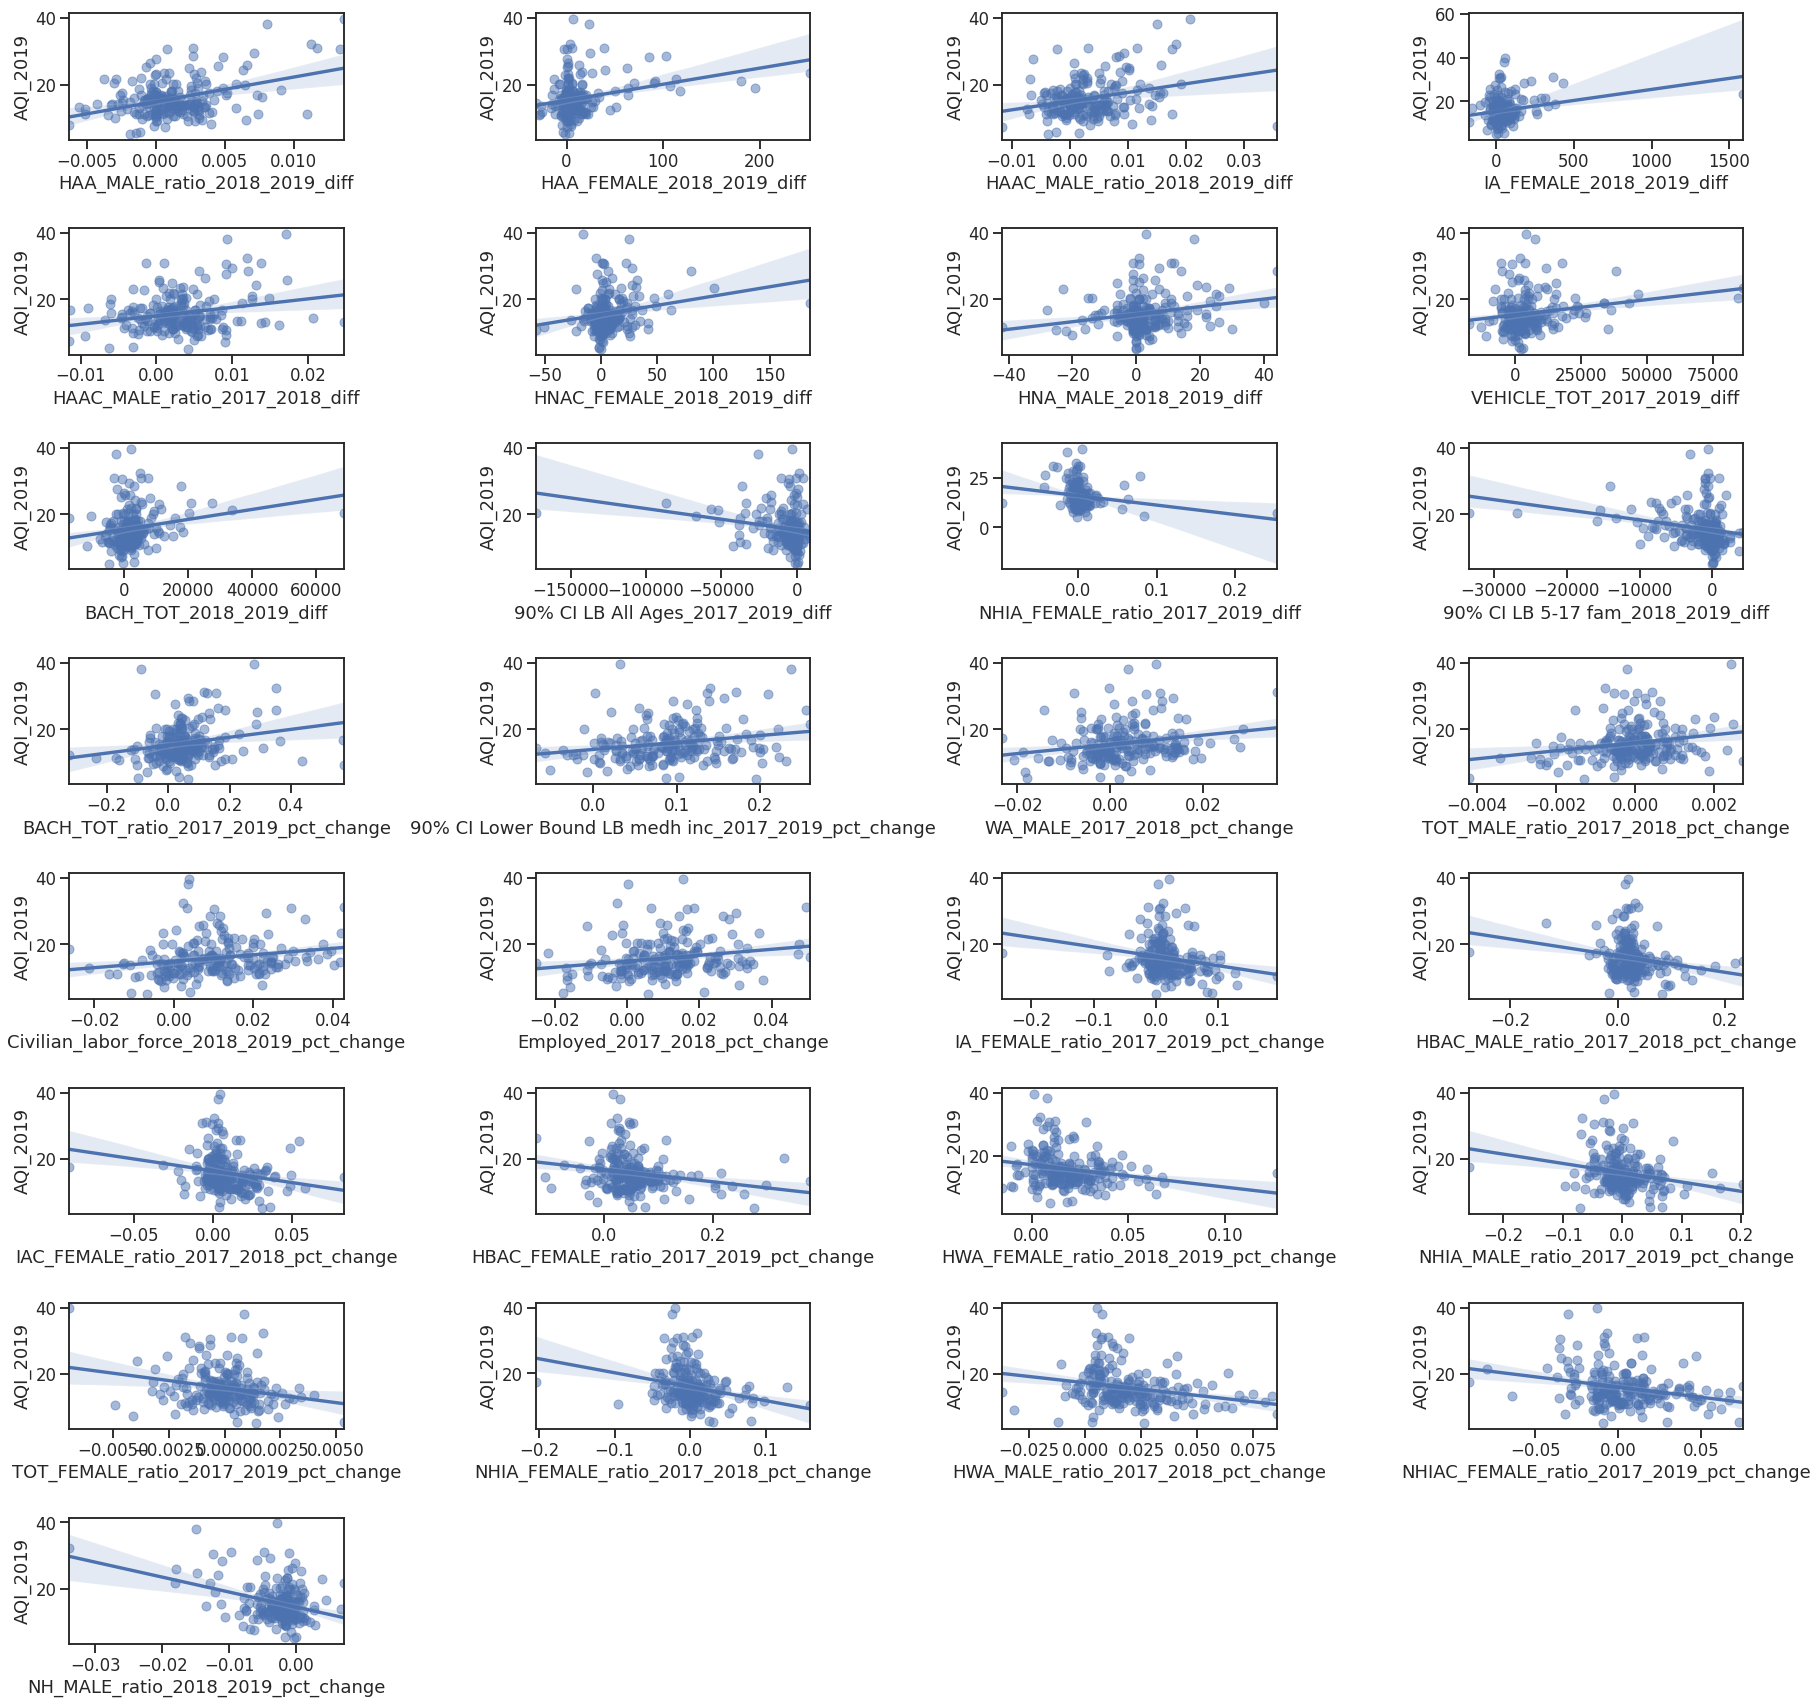

In [11]:
scatterplots(df, 'AQI_2019', columns, ncol=4, figsize=(30,30))